# Stock Profits vs Unemployment
## Monthly closing Stock price and unemployeement rate (y-axis), Year, Month combined (x-axis) for 10 years by line plot

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import calendar
from scipy.stats import linregress
from pprint import pprint

# Import the API key
from api_keys import alpha_vantage_api_key, bls_api_key, fred_api_key

In [14]:
# Monthly Stock Closing dataFrame - 1
# Constants
stock_symbol = 'QQQ'
start_date = '2010-01-01'
end_date = '2019-12-31'
URL = f'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol={stock_symbol}&apikey={alpha_vantage_api_key}&outputsize=full'


# Fetch stock data from alphavantage
response = requests.get(URL).json()

# Define an empty list to fetch the stock data
stock_data = []

for date, values in response['Time Series (Daily)'].items():
    stock_data.append({
        "Date": date,
        "Open": values['1. open'],
        "High": values['2. high'],
        "Low": values['3. low'],
        "Close": values['4. close'],
        "Volume": values['5. volume']
    })

# Conver List to dataFrame
stock_info_df = pd.DataFrame(stock_data)
stock_info_df = stock_info_df[(stock_info_df['Date'] >= start_date) & (stock_info_df['Date'] <= end_date)]

stock_info_df.reset_index()
stock_info_df['Date'] = pd.to_datetime(stock_info_df['Date'])
stock_info_df['Open'] = stock_info_df['Open'].astype(float)
stock_info_df['Close'] = stock_info_df['Close'].astype(float)

stock_info_df

,Date,Open,High,Low,Close,Volume
1086,2019-12-31,211.62,212.7600,211.2000,212.61,18201585
1087,2019-12-30,213.50,213.6300,211.1600,212.21,21829913
1088,2019-12-27,214.54,214.5600,213.0400,213.61,18142239
1089,2019-12-26,212.26,213.8100,212.2300,213.79,17159310
1090,2019-12-24,212.00,212.0900,211.4400,211.92,7089020
...,...,...,...,...,...,...
2591,2014-01-08,87.11,87.5500,86.9450,87.31,27197400
2592,2014-01-07,86.70,87.2500,86.5600,87.12,25860600
2593,2014-01-06,86.65,86.7600,86.0000,86.32,32073100
2594,2014-01-03,87.27,87.3500,86.6200,86.64,35723700


In [19]:
# Monthly Stock Closing dataFrame - 2
# Date, Month Column creation by using Date
stock_info_df['Year'] = stock_info_df['Date'].dt.year
stock_info_df['Month_Number'] = stock_info_df['Date'].dt.month

# Open price for each Year, Month & Close price for each Year, Month
monthly_data = stock_info_df.groupby(['Year', 'Month_Number'])
last_close = monthly_data['Close'].last().reset_index()

stock_info_df

,Date,Open,High,Low,Close,Volume,Year,Month_Number
1086,2019-12-31,211.62,212.7600,211.2000,212.61,18201585,2019,12
1087,2019-12-30,213.50,213.6300,211.1600,212.21,21829913,2019,12
1088,2019-12-27,214.54,214.5600,213.0400,213.61,18142239,2019,12
1089,2019-12-26,212.26,213.8100,212.2300,213.79,17159310,2019,12
1090,2019-12-24,212.00,212.0900,211.4400,211.92,7089020,2019,12
...,...,...,...,...,...,...,...,...
2591,2014-01-08,87.11,87.5500,86.9450,87.31,27197400,2014,1
2592,2014-01-07,86.70,87.2500,86.5600,87.12,25860600,2014,1
2593,2014-01-06,86.65,86.7600,86.0000,86.32,32073100,2014,1
2594,2014-01-03,87.27,87.3500,86.6200,86.64,35723700,2014,1


In [16]:
# Monthly Stock Closing dataFrame - 3 (final)

# dataFrame creation
monthly_close_df = pd.DataFrame({
                                    'Year': last_close['Year'],
                                    'Month_Number': last_close['Month_Number'],
                                    'Monthly_Close': last_close['Close']
                                })

# Generate month numbers (1-12)
month_numbers = list(range(1, 13))

# Use list comprehension to map month numbers to month names
month_names = [calendar.month_name[month] for month in month_numbers]

# Create the DataFrame
month_df = pd.DataFrame({
                            'Month_Number': month_numbers,
                            'Month': month_names
                        })

# Merge the DataFrames on 'Month' from monthly_profit_df and 'Month Number' from month_df
monthly_close_merge_df = pd.merge(monthly_close_df, month_df, left_on='Month_Number', right_on='Month_Number', how='left')

monthly_close_final_df = monthly_close_merge_df[["Year", "Month", "Monthly_Close"]]
monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')

monthly_close_final_df

C:\Users\junhy\AppData\Local\Temp\ipykernel_23956\3126557629.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monthly_close_final_df["Year"] = monthly_close_final_df["Year"].astype('str')


,Year,Month,Monthly_Close
0,2014,January,87.27
1,2014,February,84.29
2,2014,March,89.67
3,2014,April,89.21
4,2014,May,87.65
...,...,...,...
67,2019,August,190.15
68,2019,September,185.65
69,2019,October,187.27
70,2019,November,198.87


In [18]:
# Create a dataFrame for Monthly Unployment Rate

URL = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'

api_key = bls_api_key
series_id = 'LNS14000000'  # Series ID for US unemployment rate
startyear = '2014'
endyear = '2019'

# Parameter setting
params = {
    'seriesid': [series_id],
    'startyear':[startyear],
    'endyear': [endyear],
    'registrationKey': api_key
}

# Fetch unemployment data from BLS
response = requests.post(URL, json=params)
unemployment_data = response.json()

# Initialize an empty list to hold the unemployment data
unemployment_list = []

# Extract data from the response
series_data = unemployment_data["Results"]["series"][0]["data"]
for item in series_data:
    unemployment_list.append({
                                "Year": item["year"],
                                "Month": item["periodName"],
                                "Rate": item["value"]
                            })

# Convert the list to a DataFrame
unemployment_data_df = pd.DataFrame(unemployment_list).reset_index(drop=True)
unemployment_data_df["Rate"] = unemployment_data_df["Rate"].astype('float')

# Print the DataFrame
unemployment_data_df

ConnectTimeout: HTTPSConnectionPool(host='api.bls.gov', port=443): Max retries exceeded with url: /publicAPI/v2/timeseries/data/ (Caused by ConnectTimeoutError(<urllib3.connection.HTTPSConnection object at 0x0000015B0DB84AF0>, 'Connection to api.bls.gov timed out. (connect timeout=None)'))

In [10]:
# Merge two dataFrame (Nasdaq Monthly profit + Monthly Unployment Rate)

MonthlyClose_Unemploy_df = pd.merge(monthly_close_final_df, unemployment_data_df, on= ["Year","Month"], how="inner")
MonthlyClose_Unemploy_df

,Year,Month,Monthly_Close,Rate
0,2014,January,87.27,6.6
1,2014,February,84.29,6.7
2,2014,March,89.67,6.7
3,2014,April,89.21,6.2
4,2014,May,87.65,6.3
...,...,...,...,...
67,2019,August,190.15,3.6
68,2019,September,185.65,3.5
69,2019,October,187.27,3.6
70,2019,November,198.87,3.6


C:\Users\junhy\AppData\Local\Temp\ipykernel_23956\435040250.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  MonthlyClose_Unemploy_df['Date'] = pd.to_datetime(MonthlyClose_Unemploy_df['Year'].astype(str) + ' ' + MonthlyClose_Unemploy_df['Month'])


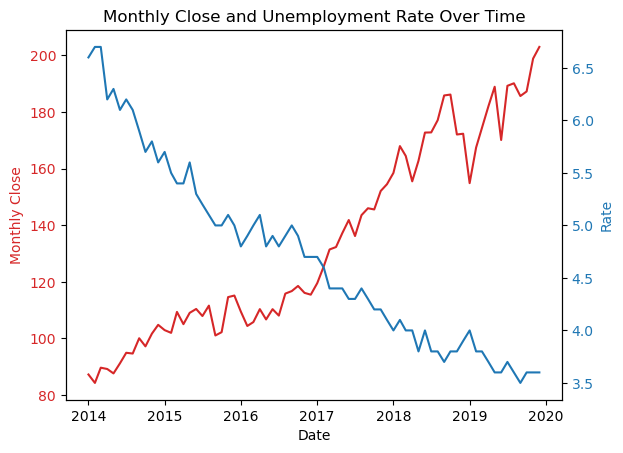

In [11]:

# Combine 'Year' and 'Month' into a 'Date' for plotting
MonthlyClose_Unemploy_df['Date'] = pd.to_datetime(MonthlyClose_Unemploy_df['Year'].astype(str) + ' ' + MonthlyClose_Unemploy_df['Month'])

# Plotting
fig, ax1 = plt.subplots()

# Create first plot - Monthly Close
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Monthly Close', color=color)
ax1.plot(MonthlyClose_Unemploy_df['Date'], MonthlyClose_Unemploy_df['Monthly_Close'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the Rate data
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Rate', color=color)  
ax2.plot(MonthlyClose_Unemploy_df['Date'], MonthlyClose_Unemploy_df['Rate'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Show the plot
plt.title('Monthly Close and Unemployment Rate Over Time')
plt.show()
